## Step 1: Description of Problem and Data
This project seeks to utilize a convolutional neural network in order to scan images from a pathology scan to identify if cancer is present in the image or not. Model like this can be extremely important as they could help medical professional identify serious diseases like cancer, so that patients can receive the necessary treatment as soon as possible. The data provided consists of 220025 images to train on with associated labels, and 57458 images for the test set. These images are provided in a ".tif" image format while the labels and final submission are ".csv" files.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
train_on_gpu = True
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Step 2: Exploratory Data Analysis
In this section we can identify the number of images in each file as well as checking that there are no null values in the data. I also want to check the proportion of images in the train set that were positive which ended up being around 40.5%. We also see that the label is provided in binary for 1 "malignant" or 0 "normal". I also display four images of different scans two of which are positive and two are normal in order to see what we are trying to get our model to see. 

In [2]:
def count_tif_files(directory):
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith(".tif"):
            count += 1
    
    return count
train_count = count_tif_files('/kaggle/input/histopathologic-cancer-detection/train')
test_count = count_tif_files('/kaggle/input/histopathologic-cancer-detection/test')

print(f"Number of entries in train dataset: {train_count}")
print(f"Number of entries in test dataset: {test_count}")

Number of entries in train dataset: 220025
Number of entries in test dataset: 57458


In [3]:
train_labels = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/train_labels.csv")
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [4]:
train_labels.label.value_counts()

label
0    130908
1     89117
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train_labels, test_size=0.2, random_state=42, stratify=train_labels['label'])
train_data['id'] += '.tif'
val_data['id'] += '.tif'
train_data.head(10)

,id,label
198607,cffe7a3ffc48700045fd37f1f448b5a892ff4f2c.tif,0
14684,b5bef3e7d7e8cc81e38fa2288105fc1c130e771a.tif,0
55923,6fe4413a3a982af28a6e78d0f445073c509b4b33.tif,0
215817,d6b4fe580210f5ea61b7c109b5c2e5cc734c3010.tif,0
10219,1b6b051e370ca8468253d2e40f686c66eecb1619.tif,1
116701,161a3685624448cb26d6d36cdbe7744d735d34a8.tif,0
96544,50f1da97486b41cc774f99d57c2560d02ce75678.tif,0
216091,234c88b0c547bc1975da9abb8cd74cd89ed54c5a.tif,0
52944,f61d67a31b652cd928ef94e36ff3fb1db707f06f.tif,1
43880,ed5a70aba921910d1af57a8e468c7b90036eeb99.tif,1


label = 1


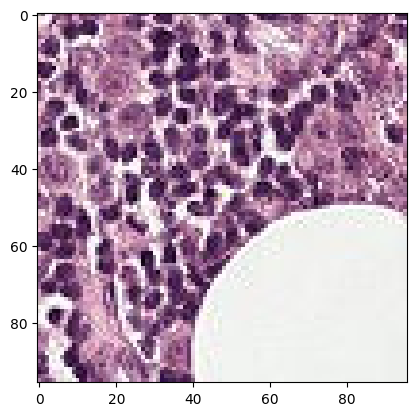

label = 1


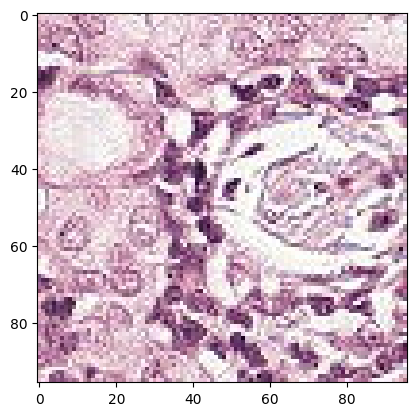

label = 0


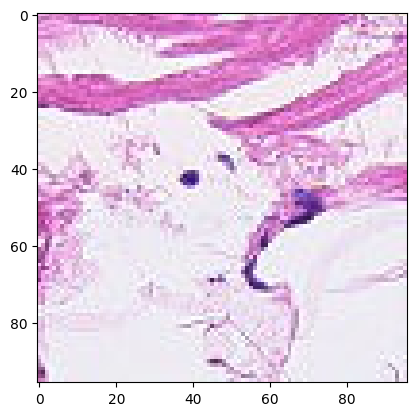

label = 0


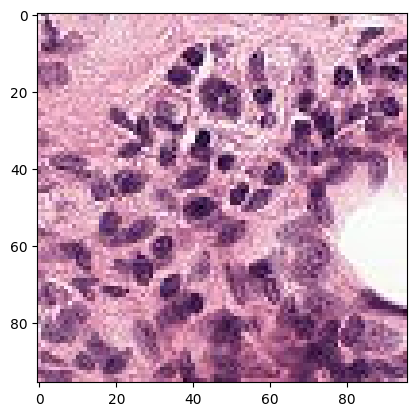

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pos_img = mpimg.imread('/kaggle/input/histopathologic-cancer-detection/train/'+train_data.id[10219])
pos_img2 = mpimg.imread('/kaggle/input/histopathologic-cancer-detection/train/'+train_data.id[52944])
plt.imshow(pos_img)
print("label = 1")
plt.show()
plt.imshow(pos_img2)
print("label = 1")
plt.show()
neg_img = mpimg.imread('/kaggle/input/histopathologic-cancer-detection/train/'+train_data.id[198607])
neg_img2 = mpimg.imread('/kaggle/input/histopathologic-cancer-detection/train/'+train_data.id[14684])
plt.imshow(neg_img)
print("label = 0")
plt.show()
plt.imshow(neg_img2)
print("label = 0")
plt.show()

In [7]:
train_data = train_data.astype(str)
val_data = val_data.astype(str)

In [8]:
train_dir = '/kaggle/input/histopathologic-cancer-detection/train'
test_dir = '/kaggle/input/histopathologic-cancer-detection/test'

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/kaggle/input/histopathologic-cancer-detection/train'
test_dir = '/kaggle/input/histopathologic-cancer-detection/test'


datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory = train_dir,
    x_col = 'id',
    y_col = 'label',
    target_size=(96,96),
    batch_size=32,
    class_mode='binary'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory = train_dir,
    x_col = 'id',
    y_col = 'label',
    target_size=(96,96),
    batch_size=32,
    class_mode='binary'
)


2024-02-29 21:24:50.484753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 21:24:50.484852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 21:24:50.613360: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 176020 validated image filenames belonging to 2 classes.
Found 44005 validated image filenames belonging to 2 classes.


## Part 3: Model Architecture
The model architecture starts with three convolutional layers, each followed by max-pooling, to extract and downsample features from the images, capturing intricate patterns and textures that correspond to cancerous cells. The network depth and filter sizes are chosen to refine feature maps, which allows the model to learn increasingly complex representations. After flattening the output of the convolutional base, a dense layer with a large number of units (512) is used to interpret these features, followed by a dropout layer to mitigate overfitting by randomly omitting units, enhancing the model's generalization to new images. The final output layer uses a sigmoid activation function to provide a probability, indicating the likelihood of cancer presence, which is good for binary outcomes like this. This architecture is better when compared to simpler or deeper models as it strikes a balance between model capacity and computational efficiency.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-02-29 21:34:07.085905: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8836: 6.17839, expected 5.44963
2024-02-29 21:34:07.085962: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8839: 5.09095, expected 4.36218
2024-02-29 21:34:07.085972: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8843: 6.28436, expected 5.55559
2024-02-29 21:34:07.085980: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8845: 5.83888, expected 5.11011
2024-02-29 21:34:07.085988: E external/local_xla/xla/service/gpu/buffer_comp

   1/5500 ━━━━━━━━━━━━━━━━━━━━ 12:32:50 8s/step - accuracy: 0.4062 - loss: 0.7218

I0000 00:00:1709242450.467380      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3837/5500 ━━━━━━━━━━━━━━━━━━━━ 5:38 204ms/step - accuracy: 0.5937 - loss: 0.6850

2024-02-29 21:47:12.534349: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44180: 7.15656, expected 6.24082
2024-02-29 21:47:12.534433: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44181: 8.03765, expected 7.12192
2024-02-29 21:47:12.534442: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44182: 7.32376, expected 6.40803
2024-02-29 21:47:12.534450: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44183: 6.00329, expected 5.08755
2024-02-29 21:47:12.534458: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44184: 6.93475, expected 6.01901
2024-02-29 21:47:12.534466: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44185: 7.6303, expected 6.71456
2024-02-29 21:47:12.534474: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44186: 7.59534, expected 6.6796
2024-02-29 21:47:12.534482: E

5500/5500 ━━━━━━━━━━━━━━━━━━━━ 1500s 271ms/step - accuracy: 0.5940 - loss: 0.6826 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 2/20
   1/5500 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.5312 - loss: 0.7017

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-02-29 21:59:02.640121: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44180: 8.02016, expected 7.07077
2024-02-29 21:59:02.640183: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44182: 7.26606, expected 6.31667
2024-02-29 21:59:02.640198: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44183: 7.47131, expected 6.52192
2024-02-29 21:59:02.640212: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44184: 7.1578, expected 6.20841
2024-02-29 21:59:02.640223: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44185: 8.13563, ex

5500/5500 ━━━━━━━━━━━━━━━━━━━━ 1s 115us/step - accuracy: 0.5312 - loss: 0.7017 - val_accuracy: 0.6000 - val_loss: 162.5596
Epoch 3/20


W0000 00:00:1709243943.145439      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5500/5500 ━━━━━━━━━━━━━━━━━━━━ 545s 99ms/step - accuracy: 0.5947 - loss: 0.6756 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 4/20
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.5938 - loss: 0.6752 - val_accuracy: 0.6000 - val_loss: 817.6995
Epoch 5/20
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 387s 70ms/step - accuracy: 0.5966 - loss: 0.6747 - val_accuracy: 0.5949 - val_loss: 0.6750
Epoch 6/20
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.5938 - loss: 0.6768 - val_accuracy: 0.0000e+00 - val_loss: 5517.7817
Epoch 7/20
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 355s 65ms/step - accuracy: 0.5948 - loss: 0.6752 - val_accuracy: 0.5950 - val_loss: 0.6750
Epoch 8/20
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.5312 - loss: 0.6974 - val_accuracy: 0.2000 - val_loss: 4487.7891
Epoch 9/20
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 358s 65ms/step - accuracy: 0.5957 - loss: 0.6748 - val_accuracy: 0.5949 - val_loss: 0.6750
Epoch 10/20
5500/5500 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.6250 - l

In [12]:
from tensorflow.keras.preprocessing import image

def load_and_process_image(image_path):
    img = image.load_img(image_path, target_size=(96, 96))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    return img_tensor

In [13]:
test_images = os.listdir(test_dir)
predictions = []
for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    img_tensor = load_and_process_image(img_path)
    pred = model.predict(img_tensor, verbose=0)
    predictions.append(pred[0][0])

2024-02-29 22:32:09.638992: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13181: 3.28429, expected 2.84901
2024-02-29 22:32:09.639059: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16470: 3.21095, expected 2.77566
2024-02-29 22:32:09.639074: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 17736: 4.91057, expected 4.31149
2024-02-29 22:32:09.639082: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 17922: 4.95471, expected 4.35562
2024-02-29 22:32:09.639091: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 17993: 4.56332, expected 3.96424
2024-02-29 22:32:09.639098: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 18004: 4.88283, expected 4.28375
2024-02-29 22:32:09.639106: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 18075: 4.78862, expected 4.18954
2024-02-29 22:32:09.639114:

In [14]:
file_ids = [filename.split('.tif')[0] for filename in test_images]
df = pd.DataFrame({
    'id': file_ids,
    'label': predictions
})
df.to_csv('predictions.csv', index=False)

## Part 4: Results and Analysis
I tried three different iterations of models with different achitecture and training parameters and still the best result that came of them was around 50% accuracy. While this accuracy is disappointing it was still nice to see improvement with some of the adjustments I made. Some of these include reducing the number of layers or chaning the number of epochs. I ultimately decided to implement the model above because it took a reasonable amount of time to train as I utilized early stopping for my epochs that would stop if there was little to no improvement. This allowed me to increase my number of epochs while reducing the training time making things more efficient. One of the main concerns was computational efficiency as the models would sometimes take upto 6 hours to train, this made it more difficult to try out different combinations of hyper parameters or even pursue a grid search as it would not take a reasonable amount of time.

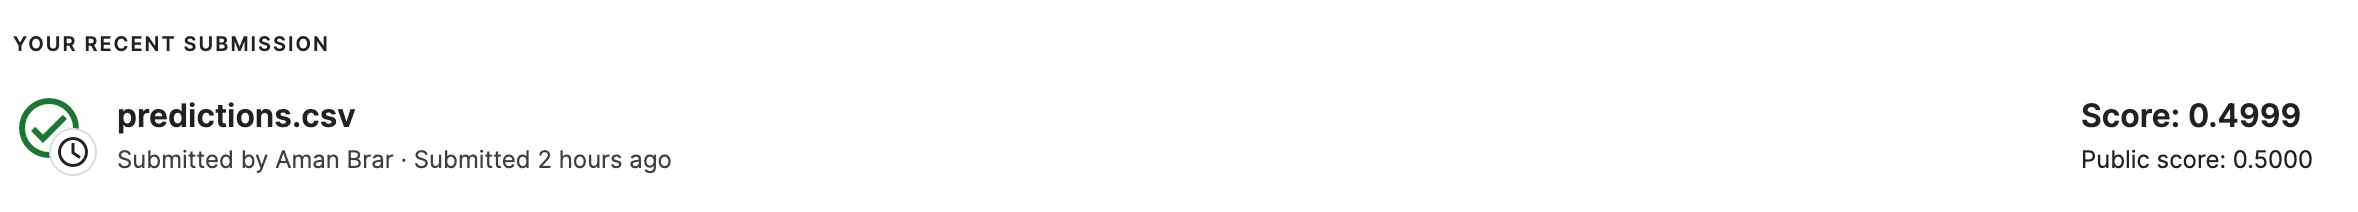

## Part 5: Conclusion
My big takeaway from this is while my model did not perform extremely well this served as a proof of concept that we are able to build CNNs and models of the like that can have very important usecases, such as detecting cancer! Some of the adjustments made such as increasing the number of training epochs I believe were very helpful in better training the neural network. In the future, perhaps with more time and resources I could build a much more robust and accurate model. 